# **Librerías**

In [1]:
# se utilizan para instalar bibliotecas en Python que permiten trabajar con archivos Excel.
%pip install xlrd
%pip install openpyxl

In [2]:
# Importamos las librerías que vamos a utilizar en todo el proyecto
import pandas as pd
import os
import numpy as np
from datetime import timedelta, datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

# **Cargar datos**

In [4]:
# Con la librería pandas leemos el csv del trabajo
cs = pd.read_csv("/content/Electric_Vehicle_Charging_Station_Data_-8671638762898357044.csv")

In [5]:
# Para saber si tenemos valores nulos (NaN) en nuestras columnas
cs.isnull().sum()

Station_Name                  0
Address                       0
City                          0
State_Province                0
Zip_Postal_Code               0
Start_Date___Time             0
Start_Time_Zone               0
End_Date___Time               4
End_Time_Zone                 0
Total_Duration__hh_mm_ss_     0
Charging_Time__hh_mm_ss_      0
Energy__kWh_                  0
GHG_Savings__kg_              0
Gasoline_Savings__gallons_    0
Port_Type                     0
ObjectID                      0
ObjectId2                     0
dtype: int64

In [6]:
# Para tener información del dataframe y cada una de sus columnas
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148136 entries, 0 to 148135
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Station_Name                148136 non-null  object 
 1   Address                     148136 non-null  object 
 2   City                        148136 non-null  object 
 3   State_Province              148136 non-null  object 
 4   Zip_Postal_Code             148136 non-null  int64  
 5   Start_Date___Time           148136 non-null  object 
 6   Start_Time_Zone             148136 non-null  object 
 7   End_Date___Time             148132 non-null  object 
 8   End_Time_Zone               148136 non-null  object 
 9   Total_Duration__hh_mm_ss_   148136 non-null  object 
 10  Charging_Time__hh_mm_ss_    148136 non-null  object 
 11  Energy__kWh_                148136 non-null  float64
 12  GHG_Savings__kg_            148136 non-null  float64
 13  Gasoline_Savin

In [7]:
# Imprimir el tipos de dato que tiene cada columna
print(cs.dtypes)

Station_Name                   object
Address                        object
City                           object
State_Province                 object
Zip_Postal_Code                 int64
Start_Date___Time              object
Start_Time_Zone                object
End_Date___Time                object
End_Time_Zone                  object
Total_Duration__hh_mm_ss_      object
Charging_Time__hh_mm_ss_       object
Energy__kWh_                  float64
GHG_Savings__kg_              float64
Gasoline_Savings__gallons_    float64
Port_Type                      object
ObjectID                        int64
ObjectId2                       int64
dtype: object


In [8]:
# Para trabajar de manera mas sencilla con las columnas
estacion = cs["Station_Name"]
direccion = cs["Address"]
ciudad = cs["City"]
provincia = cs["State_Province"]
cod_postal = cs["Zip_Postal_Code"]
tiempo_inicial = cs["Start_Date___Time"]
zona_ti = cs["Start_Time_Zone"]
tiempo_final = cs["End_Date___Time"]
zona_tf = cs["End_Time_Zone"]
Duracion_total = cs["Total_Duration__hh_mm_ss_"]
tiempo_carga = cs["Charging_Time__hh_mm_ss_"]
energia = cs["Energy__kWh_"]
GHG_saving = cs["GHG_Savings__kg_"]
gal_gas_ahorrado = ["Gasoline_Savings__gallons_"]

# **Visualización del dataframe**

In [9]:
# Análisis exploratorio de nuestros datos
# ¿En qué estado se encuentran?
# ¿Qué hay en cada columna?
display(cs)

,Station_Name,Address,City,State_Province,Zip_Postal_Code,Start_Date___Time,Start_Time_Zone,End_Date___Time,End_Time_Zone,Total_Duration__hh_mm_ss_,Charging_Time__hh_mm_ss_,Energy__kWh_,GHG_Savings__kg_,Gasoline_Savings__gallons_,Port_Type,ObjectID,ObjectId2
0,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/1/2018 17:49,MDT,1/1/2018 19:52,MDT,2:03:02,2:02:44,6.504,2.732,0.816,Level 2,0,1
1,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 8:52,MDT,1/2/2018 9:16,MDT,0:24:34,0:24:19,2.481,1.042,0.311,Level 2,1,2
2,BOULDER / JUNCTION ST1,2280 Junction Pl,Boulder,Colorado,80301,1/2/2018 21:11,MDT,1/3/2018 6:23,MDT,9:12:21,3:40:52,15.046,6.319,1.888,Level 2,2,3
3,BOULDER / ALPINE ST1,1275 Alpine Ave,Boulder,Colorado,80304,1/3/2018 9:19,MDT,1/3/2018 11:14,MDT,1:54:51,1:54:29,6.947,2.918,0.872,Level 2,3,4
4,BOULDER / BASELINE ST1,900 Baseline Rd,Boulder,Colorado,80302,1/3/2018 14:13,MDT,1/3/2018 14:30,MDT,0:16:58,0:16:44,1.800,0.756,0.226,Level 2,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148131,BOULDER / N BOULDER REC 1,3172 Broadway,Boulder,Colorado,80304,11/30/2023 19:58,MST,11/30/2023 20:10,MST,0:12:13,0:11:42,1.194,0.848,0.150,Level 2,77937,148132
148132,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:00,MST,11/30/2023 20:01,MST,0:01:07,0:00:00,0.000,0.000,0.000,Level 2,77938,148133
148133,BOULDER / CARPENTER PARK1,1505 30th St,Boulder,Colorado,80303,11/30/2023 20:01,MST,11/30/2023 20:21,MST,0:19:52,0:19:43,1.899,1.349,0.238,Level 2,77939,148134
148134,BOULDER / REC CENTER ST2,1360 Gillaspie Dr,Boulder,Colorado,80305,11/30/2023 21:03,MST,11/30/2023 21:31,MST,0:28:08,0:27:50,1.499,1.064,0.188,Level 2,77940,148135


# **Transformacion de datos**

**1.Borramos las columnas que no van a ser necesarias para el análisis del dataframe**




In [10]:
cs = cs.drop(columns=["Port_Type"])
cs = cs.drop(columns=["ObjectID"])
cs = cs.drop(columns=["ObjectId2"])

**2. Convertir las fechas con datos del datatime**






> * La primera línea intenta convertir la columna `Start_Date___Time` en objetos `datetime`.
* `errors='coerce'`: Este argumento indica a la función `pd.to_datetime` que reemplace cualquier valor que no pueda ser convertido a objetos datetime con valores `NaT` (Not a Time) en lugar de generar un error.
* `format='%m/%d/%Y %H:%M':` Este argumento especifica el formato esperado para las cadenas de fecha y hora en la columna. Asume que el formato es 'mes/día/año hora:minuto'. Este especificador de formato le indica a la función cómo interpretar el orden de los componentes en la cadena.



> *  La segunda línea intenta llenar cualquier valor faltante (`NaT` u otros tipos) en la columna recién creada `Start_Date___Time_fixed`.
* Utiliza el método `fillna` para reemplazar los valores faltantes con el resultado de otra conversión `pd.to_datetime`.
* Similar al paso 1, utiliza `errors='coerce'` para manejar posibles errores de conversión.
* Sin embargo, esta vez, el especificador de formato es `'%Y-%m-%d %H:%M:%S'`. Esto supone que el formato alternativo podría ser 'año-mes-día hora:minuto:segundo'.









In [11]:
#Paso 1: Convertir las columas 'Start_Date___Time' al tipo de dato Datetime
cs['Start_Date___Time_fixed'] = pd.to_datetime(cs['Start_Date___Time'], errors= 'coerce', format = '%m/%d/%Y %H:%M')
cs['Start_Date___Time_fixed'] = cs['Start_Date___Time_fixed'].fillna(pd.to_datetime(cs['Start_Date___Time'], errors= 'coerce', format = '%Y-%m-%d %H:%M:%S'))



> Esta línea de código se encarga de asignar una zona horaria específica (América/Denver) a las marcas de tiempo (fecha y hora) que se encuentran en la columna `Start_Date___Time_fixed` de tu DataFrame (`cs`). Además, toma en cuenta la posibilidad de ambigüedades causadas por el horario de verano (DST, Daylight Saving Time)



In [12]:
# Paso 2: Localizar las fechas y horas en la zona horaria
cs['Start_Date___Time_fixed'] = cs['Start_Date___Time_fixed'].dt.tz_localize(tz='America/Denver', ambiguous=np.array(cs['Start_Time_Zone']== 'MDT'))



> Esta línea toma las marcas de tiempo con zona horaria (localizadas previamente) en la columna `Start_Date___Time_fixed` y las convierte a la hora del Tiempo Universal Coordinado (`UTC`). Esto te permite tener una referencia temporal consistente sin importar la zona horaria original de los datos



In [13]:
#Paso 3: Convertir a UTC
cs['Start_Date___Time_utc'] = cs['Start_Date___Time_fixed'].dt.tz_convert('UTC')

In [14]:
#Paso 4: Convertir las columas 'End_Date___Time' al tipo de dato Datetime
cs['End_Date___Time_fixed'] = pd.to_datetime(cs['End_Date___Time'], errors= 'coerce', format = '%m/%d/%Y %H:%M')
cs['End_Date___Time_fixed'] = cs['End_Date___Time_fixed'].fillna(pd.to_datetime(cs['End_Date___Time'], errors= 'coerce', format = '%Y-%m-%d %H:%M:%S'))

In [15]:
# Paso 5: Localizar las fechas y horas en la zona horaria
cs['End_Date___Time_fixed'] = cs['End_Date___Time_fixed'].dt.tz_localize(tz='America/Denver', ambiguous=np.array(cs['Start_Time_Zone']== 'MDT'))

In [16]:
#Paso 3: Convertir a UTC
cs['End_Date___Time_utc'] = cs['End_Date___Time_fixed'].dt.tz_convert('UTC')

In [17]:
import pandas as pd

def convert_to_timedelta(duration_str):
    parts = duration_str.split(':')
    if len(parts) != 3:
        # Manejo del error: devuelve Timedelta de 0 o NaT
        return pd.Timedelta(0)
    hours, minutes, seconds = map(int, parts)
    return pd.Timedelta(hours=hours, minutes=minutes, seconds=seconds)

# Asumiendo que cs es tu DataFrame
cs["Charging_Time__hh_mm_ss_"] = cs["Charging_Time__hh_mm_ss_"].apply(convert_to_timedelta)
cs["Total_Duration__hh_mm_ss_"] = cs["Total_Duration__hh_mm_ss_"].apply(convert_to_timedelta)


# **Estadísticas**

## **0. Estadistica prescriptiva**

In [18]:
# Estadísticas descriptivas de la energía
estadisticas_energy = cs["Energy__kWh_"].describe()
estadisticas_energy

count    148136.000000
mean          8.456551
std           8.873097
min           0.000000
25%           2.803750
50%           6.217000
75%          11.391000
max          92.691000
Name: Energy__kWh_, dtype: float64

## **1. Gráficos de dispersión (Scatter plots)**

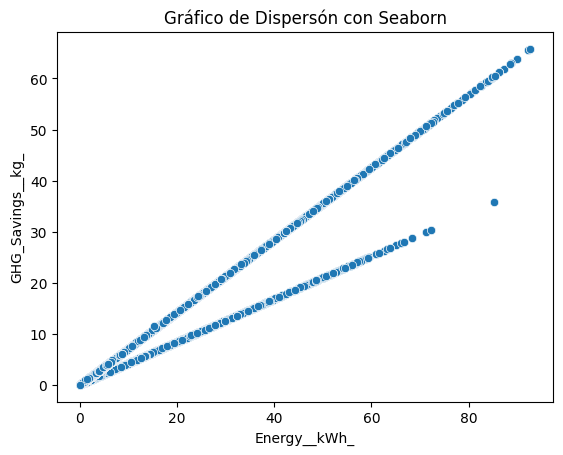

In [19]:
# Gráfico de dispersión utilizando seaborn (https://seaborn.pydata.org/)
sns.scatterplot(data=cs,x='Energy__kWh_' ,y='GHG_Savings__kg_' )
plt.title('Gráfico de Dispersón con Seaborn')
plt.show()

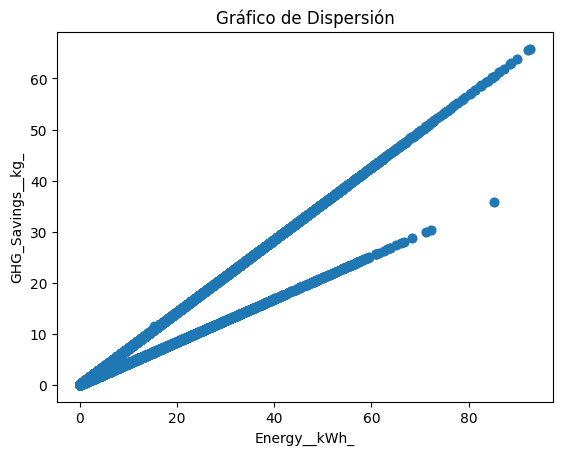

In [20]:
# Gráfico de dispersión utilizando matplotlib (https://matplotlib.org/)
plt.scatter(cs['Energy__kWh_'], cs['GHG_Savings__kg_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Energy__kWh_')
plt.ylabel('GHG_Savings__kg_')
plt.show()

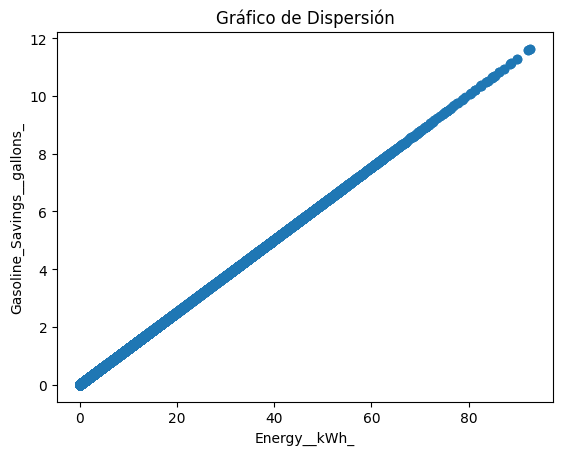

In [21]:
#  Gráfico de dispersión entre la energía y los galones de gasolina ahorrada
plt.scatter(cs['Energy__kWh_'], cs['Gasoline_Savings__gallons_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Energy__kWh_')
plt.ylabel('Gasoline_Savings__gallons_')
plt.show()



## **2. Histográmas**

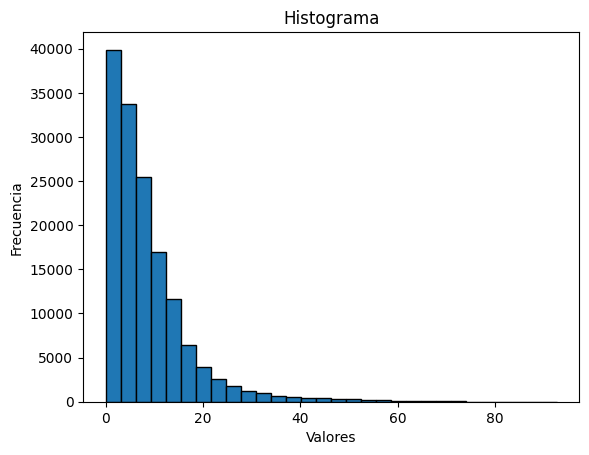

In [22]:
# Histograma utilizando matplotlib del valor de la energía
plt.hist(cs['Energy__kWh_'], bins=30, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

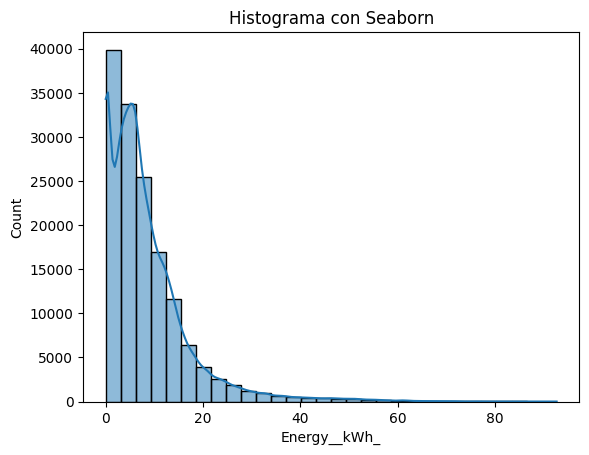

In [23]:
# Histograma utilizando seaborn de la energía
sns.histplot(data=cs, x='Energy__kWh_', bins=30, kde=True)
plt.title('Histograma con Seaborn')
plt.show()

In [24]:
# Pra convertir la duración total en horas, minutos y segundos y asi poder analizarlo mejor

# Convertir la columna a cadena
cs['Total_Duration__hh_mm_ss_'] = cs['Total_Duration__hh_mm_ss_'].astype(str)

# Definir una función para limpiar y convertir el tiempo
def parse_time(duration):
    # Usar una expresión regular para encontrar el patrón de tiempo
    import re
    match = re.match(r'(?:(\d+)\s*days?\s*)?(?:(\d+):(\d+):(\d+))?', duration)
    if match:
        days = int(match.group(1)) if match.group(1) else 0
        hours = int(match.group(2)) if match.group(2) else 0
        minutes = int(match.group(3)) if match.group(3) else 0
        seconds = int(match.group(4)) if match.group(4) else 0
        total_hours = days * 24 + hours
        return total_hours, minutes, seconds
    else:
        return np.nan, np.nan, np.nan

# Aplicar la función a cada fila
cs[['hours', 'minutes', 'seconds']] = cs['Total_Duration__hh_mm_ss_'].apply(parse_time).apply(pd.Series)

# Eliminar filas con valores no convertibles
cs.dropna(subset=['hours', 'minutes', 'seconds'], inplace=True)

# Convertir todas las unidades a segundos
cs['total_seconds'] = cs['hours'] * 3600 + cs['minutes'] * 60 + cs['seconds']
cs['total_minutes'] = cs['total_seconds'] / 60
cs['total_hours'] = cs['total_minutes'] / 60

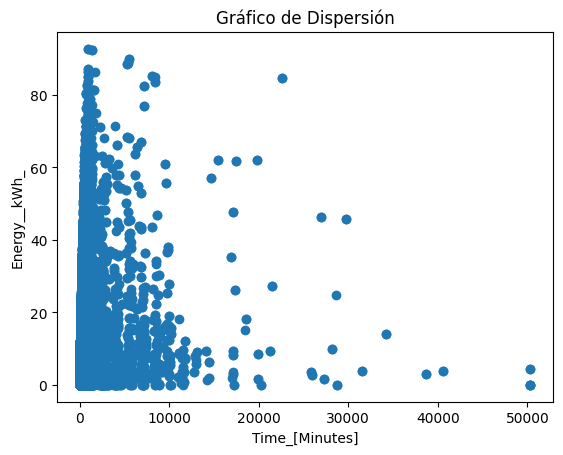

In [25]:
# Gráfico de dispersión entre el tiempo total en minutos de la carga con respecto a la energía utilizada
plt.scatter(cs['total_minutes'], cs['Energy__kWh_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Time_[Minutes]')
plt.ylabel('Energy__kWh_')
plt.show()

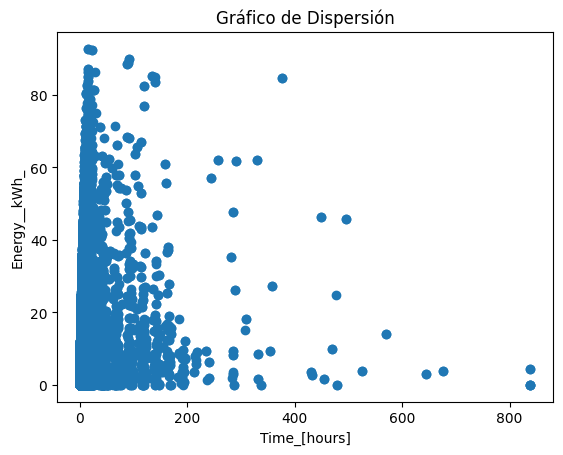

In [26]:
# Gráfico de dispersión entre el tiempo total en minutos de la carga con respecto a la energía utilizada
plt.scatter(cs['total_hours'], cs['Energy__kWh_'])
plt.title('Gráfico de Dispersión')
plt.xlabel('Time_[hours]')
plt.ylabel('Energy__kWh_')
plt.show()

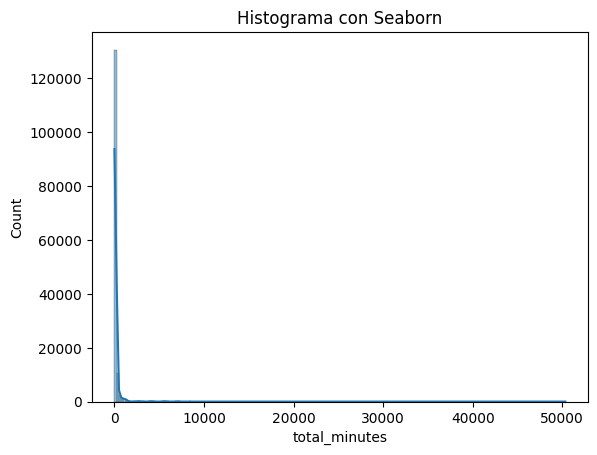

In [27]:
# Hostograma del total de minutos de carga
sns.histplot(data=cs, x='total_minutes', bins=200, kde=True)
plt.title('Histograma con Seaborn')
plt.show()

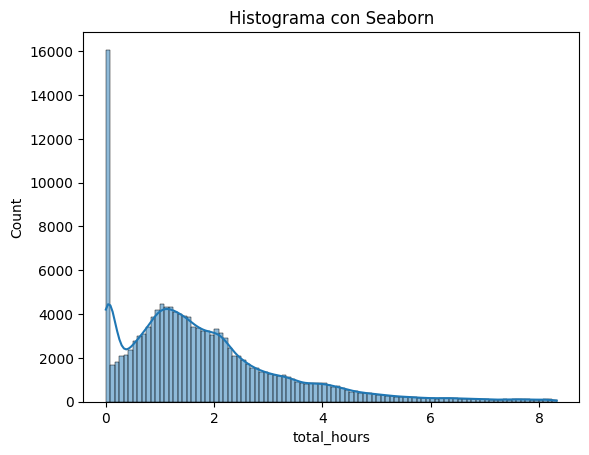

In [28]:
# Histograma de las cargas que toman menos de 200 horas
# Convertir una valiable en el filtro de filas menores a 200 minutos
Data_time = cs.loc[cs['total_minutes'] < 500, 'total_hours']

sns.histplot(data=Data_time, bins=100, kde=True)
plt.title('Histograma con Seaborn')
plt.show()

**Si decidimos de applicar una tarifa por tiempo de bloqueo cuando es superior a 4 horas de 100 pesos por minuto, cuanto podriamos recolectar?**

In [29]:
cs_prueba = cs
# Crear una nueva columna 'payment' donde se calcula el pago si las horas son mayores a 4
cs_prueba['payment'] = cs.apply(lambda row: (row['total_minutes'] * 100) if row['total_hours'] > 4 else 0, axis=1)

# Sumar todos los valores de la columna 'payment' para obtener el total recolectado
total_payment = cs_prueba['payment'].sum()

# Mostrar el DataFrame resultante y el total de pagos
print(cs_prueba["payment"])
print(f"Total recolectado: {total_payment} pesos")

0             0.000000
1             0.000000
2         55235.000000
3             0.000000
4             0.000000
              ...     
148131        0.000000
148132        0.000000
148133        0.000000
148134        0.000000
148135    57528.333333
Name: payment, Length: 148136, dtype: float64
Total recolectado: 1743932080.0000002 pesos


## **1. Gráficos de barras (bar plots)**

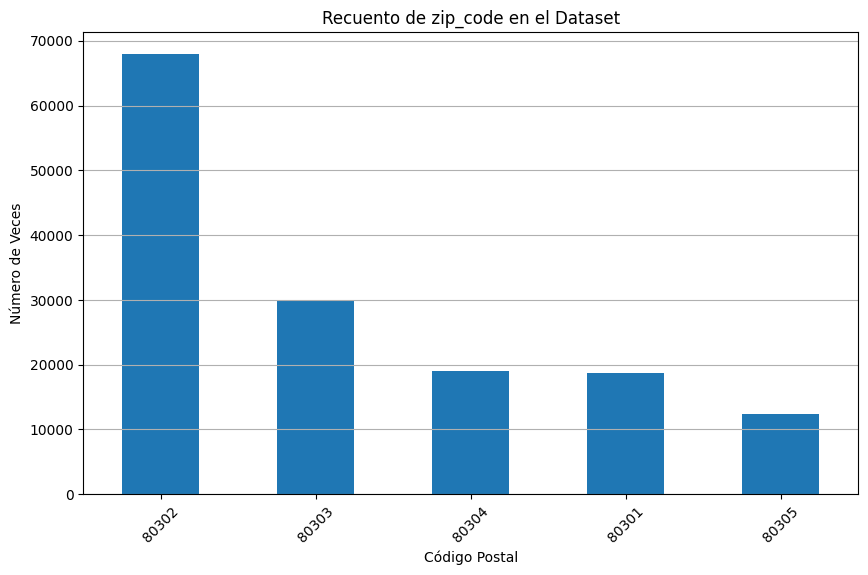

In [30]:
# Diagrama de barras sobre numero de veces que se cargo de a cuerdo a cada zip postal code
zip_code_counts = cs['Zip_Postal_Code'].value_counts()
station_counts = cs['Station_Name'].value_counts()

plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
zip_code_counts.plot(kind='bar')
plt.title('Recuento de zip_code en el Dataset')
plt.xlabel('Código Postal')
plt.ylabel('Número de Veces')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Mostrar líneas de la cuadrícula en el eje y
plt.show()

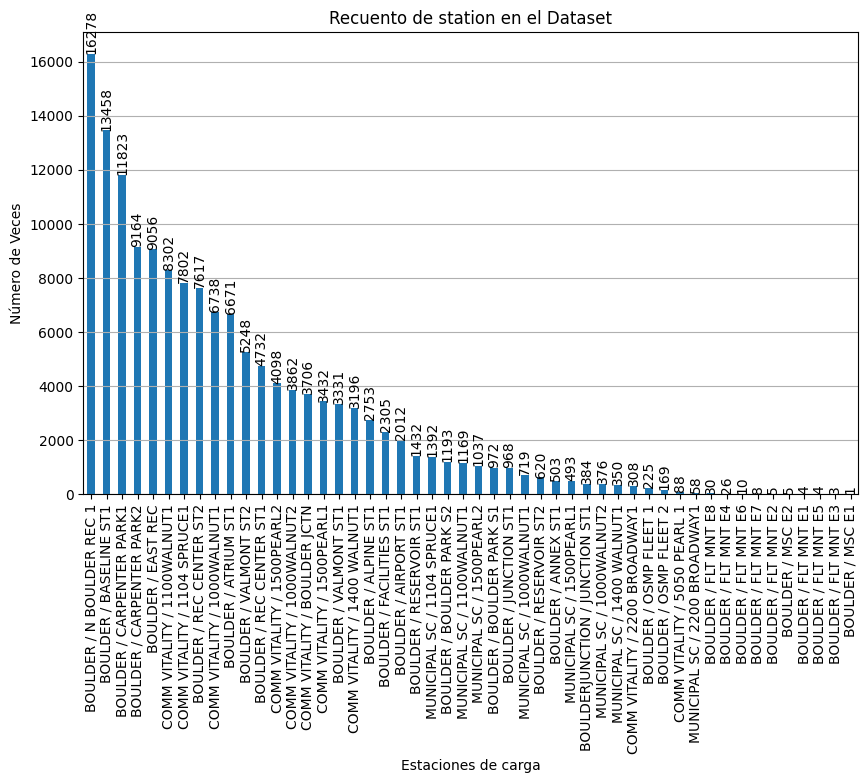

In [31]:
# Diagrama de barras con cada estación de carga
plt.figure(figsize=(10, 6))  # Tamaño opcional del gráfico
ax = station_counts.plot(kind='bar')
plt.title('Recuento de station en el Dataset')
plt.xlabel('Estaciones de carga')
plt.ylabel('Número de Veces')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.grid(axis='y')  # Mostrar líneas de la cuadrícula en el eje y
for i in ax.containers:
    ax.bar_label(i, label_type='edge', rotation=90) #Para la etiqueta de categoría
plt.show()

##**4. Diagramas de Caja (Box Plots)**

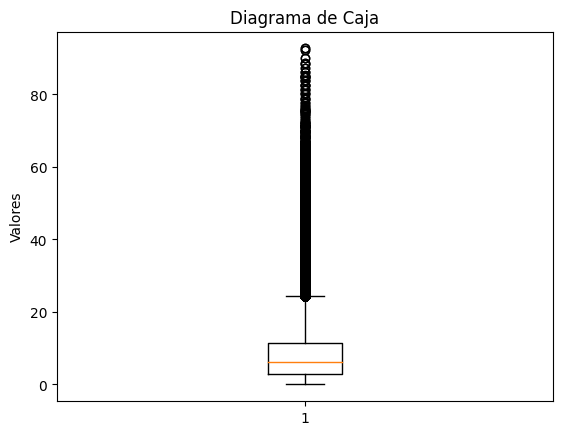

In [32]:
# Diagrama de cajas de la energía

plt.boxplot(cs['Energy__kWh_'])
plt.title('Diagrama de Caja')
plt.ylabel('Valores')
plt.show()

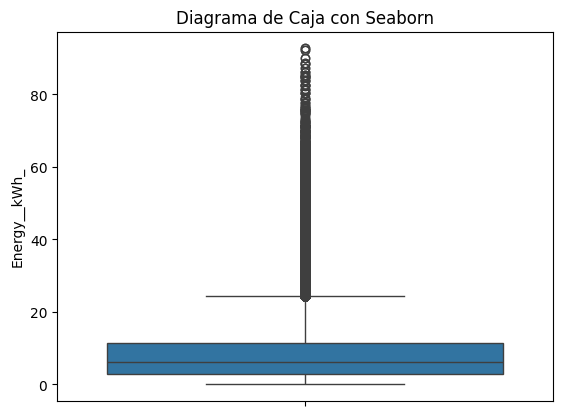

In [33]:
# Mismo diagrama pero con seaborn

sns.boxplot(data=cs, y='Energy__kWh_')
plt.title('Diagrama de Caja con Seaborn')
plt.show()

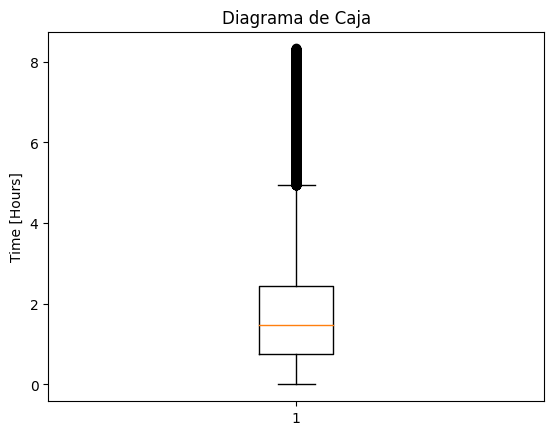

In [34]:
# Diagrama de caja del tiempo en horas

plt.boxplot(Data_time)
plt.title('Diagrama de Caja')
plt.ylabel('Time [Hours]')
plt.show()

## **5. Mapas de Calor (Heatmaps)**

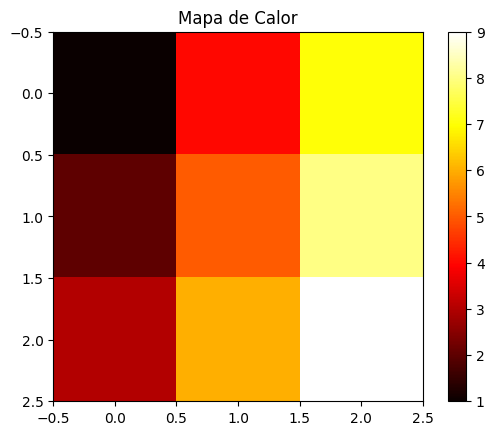

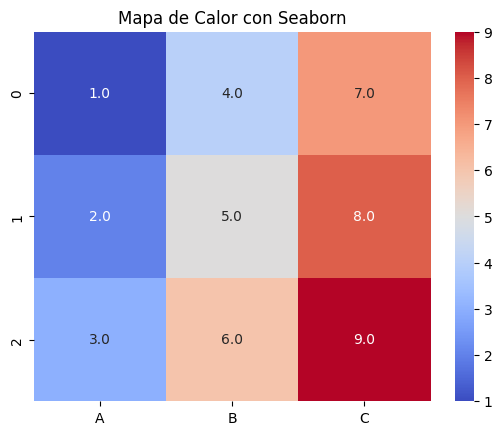

In [35]:
# Crear un DataFrame de ejemplo
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)

# Mapa de calor utilizando matplotlib
plt.imshow(df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Mapa de Calor')
plt.show()

# Mapa de calor utilizando seaborn
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Mapa de Calor con Seaborn')
plt.show()


# **Perfil de carga**

El perfil de carga se refiere a la distribución temporal del consumo de energía eléctrica. En el contexto de una empresa de energía que carga carros eléctricos, el perfil de carga describe cómo varía la demanda de electricidad a lo largo del tiempo debido a la carga de estos vehículos. Este perfil es crucial para entender y gestionar la demanda de energía, asegurando que la infraestructura de carga pueda satisfacer las necesidades de los usuarios sin sobrecargar la red eléctrica.



*   Este código se utiliza para agrupar los datos de consumo de energía por fecha y hora, calcular la suma de energía consumida en cada uno de esos intervalos, y ordenar el resultado cronológicamente. Esto es útil para analizar el consumo de energía a lo largo del tiempo y detectar patrones en el uso de la energía.




In [36]:
# Agrupación nuevamente para el cálculo de la suma de Energía de ChargeID para todo el día y horas.
total_energy_per_hour = cs.groupby(['Start_Date___Time_utc'])['Energy__kWh_'].sum().reset_index().sort_values(by='Start_Date___Time_utc', ascending=True)

In [37]:
print(total_energy_per_hour)

          Start_Date___Time_utc  Energy__kWh_
0     2018-01-02 00:49:00+00:00        13.008
1     2018-01-02 15:52:00+00:00         4.962
2     2018-01-03 04:11:00+00:00        30.092
3     2018-01-03 16:19:00+00:00        13.894
4     2018-01-03 21:13:00+00:00         3.600
...                         ...           ...
82844 2023-12-01 02:58:00+00:00         1.194
82845 2023-12-01 03:00:00+00:00         0.000
82846 2023-12-01 03:01:00+00:00         1.899
82847 2023-12-01 04:03:00+00:00         1.499
82848 2023-12-01 06:27:00+00:00        17.755

[82849 rows x 2 columns]


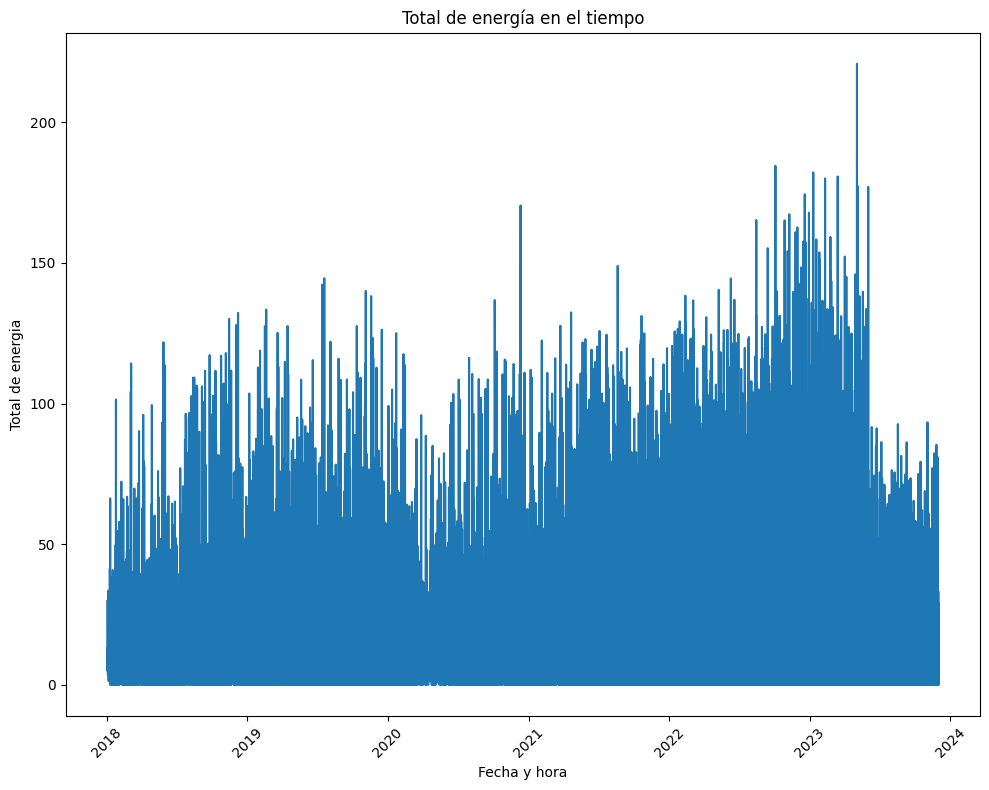

In [38]:
# Graficamos el perfil de carga obtenido
import matplotlib.pyplot as plt

# Definimos las variables X y Y de nuestro gráfico
x = pd.to_datetime(total_energy_per_hour['Start_Date___Time_utc'])
y = total_energy_per_hour['Energy__kWh_']

# Plot
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.xlabel('Fecha y hora')
plt.ylabel('Total de energia')
plt.title('Total de energía en el tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

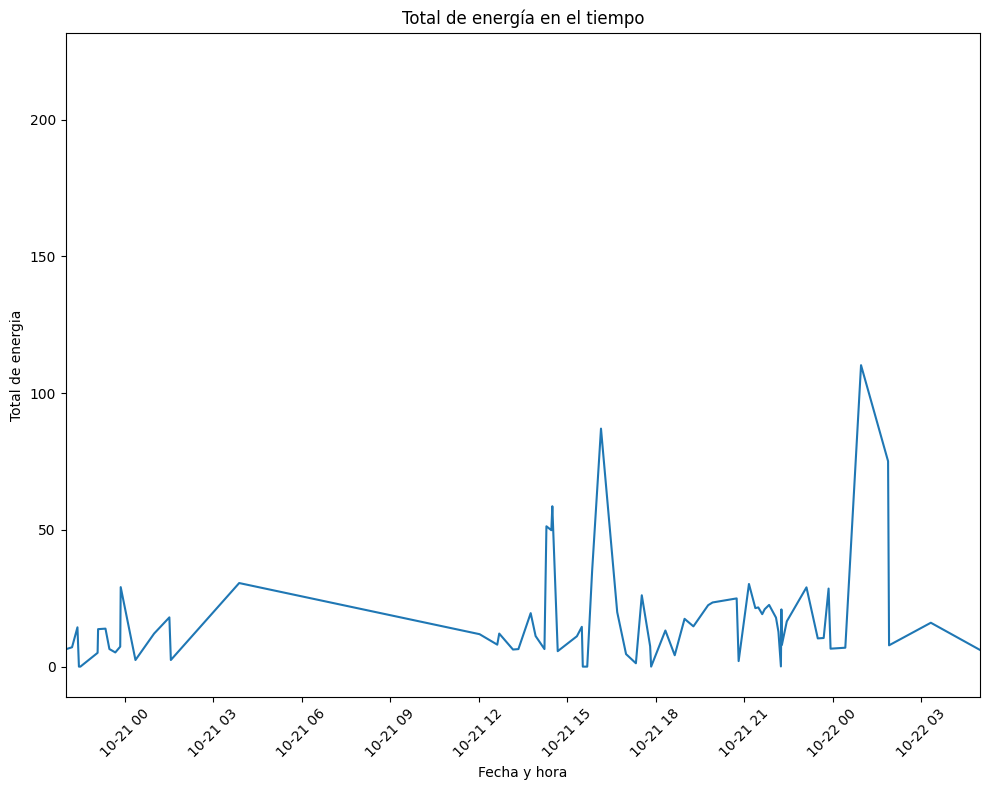

In [39]:
# Hacer un acercamiento a el comportamiento de la energía en el tiempo
plt.figure(figsize=(10, 8))
plt.plot(x, y)
plt.xlabel('Fecha y hora')
plt.ylabel('Total de energia')
plt.title('Total de energía en el tiempo')
# Es un filtro en el tiempo
plt.xlim( [pd.to_datetime('2022-10-20 22:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2022-10-22 05:00:00', format = '%Y-%m-%d %H:%M:%S')])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Creamos un  dataset solo con las columnas de energia y el tiempo en que se inicio la carga
Energy_dataset = cs[['Start_Date___Time_utc', 'Energy__kWh_']]

In [41]:
# definimos start time como índice del dataframe
Energy_dataset.set_index('Start_Date___Time_utc', inplace=True)

# Agrupamos los intervalos de tiempo en horas para ahora agregar la suma de nuestra energía por esa hora
Energy_dataset_profile = Energy_dataset.resample('H').agg({'Energy__kWh_': 'sum'})

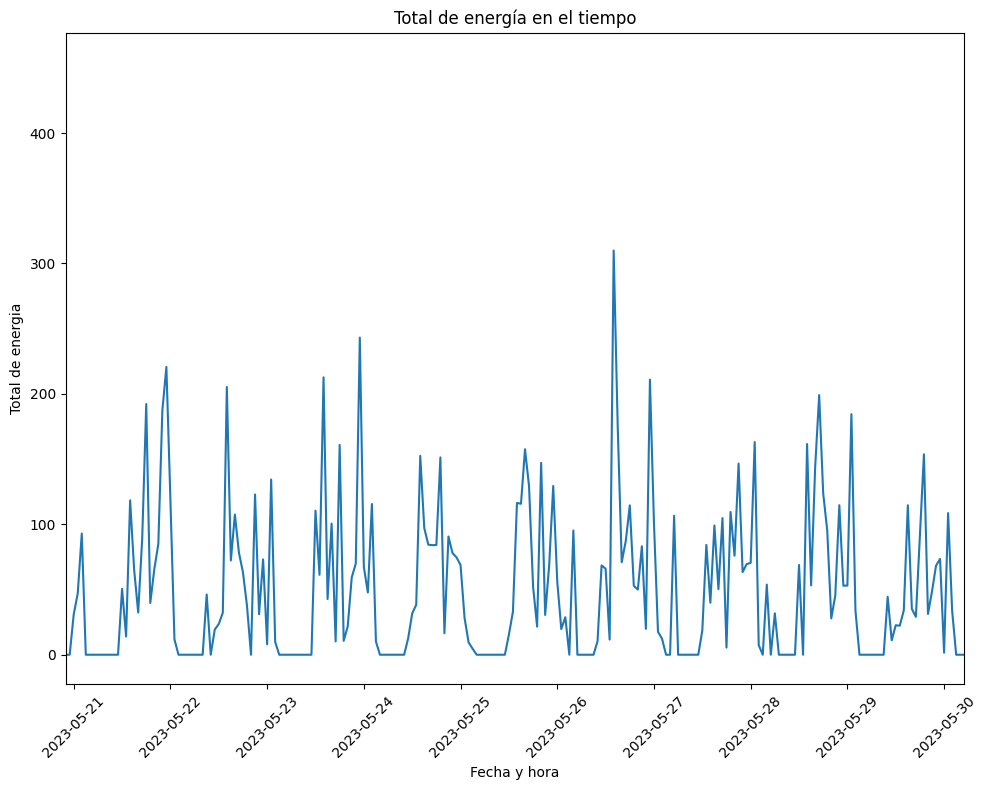

In [42]:
# Graficamos un ejemplo de los datos para observar su comportamiento
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile)
plt.xlabel('Fecha y hora')
plt.ylabel('Total de energia')
plt.title('Total de energía en el tiempo')
# Es un filtro en el tiempo
plt.xlim( [pd.to_datetime('2023-05-20 22:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-30 05:00:00', format = '%Y-%m-%d %H:%M:%S')])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Observamos el dataset creado por hora
display(Energy_dataset_profile)

,Energy__kWh_
Start_Date___Time_utc,
2018-01-02 00:00:00+00:00,13.008
2018-01-02 01:00:00+00:00,0.000
2018-01-02 02:00:00+00:00,0.000
2018-01-02 03:00:00+00:00,0.000
2018-01-02 04:00:00+00:00,0.000
...,...
2023-12-01 02:00:00+00:00,6.951
2023-12-01 03:00:00+00:00,1.899
2023-12-01 04:00:00+00:00,1.499


In [44]:
# Ahora creamos el perfil de carga pero por día
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

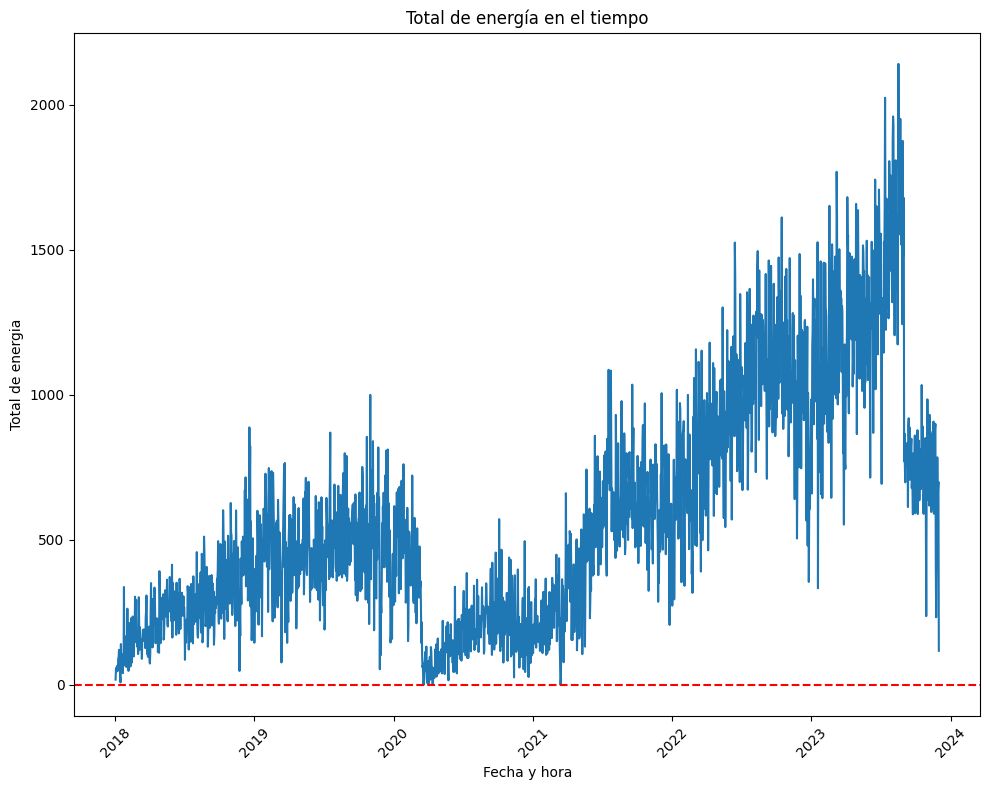

In [45]:
# Graficamos el comportamiento del perfil de carga por día
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile_day)
plt.xlabel('Fecha y hora')
plt.ylabel('Total de energia')
plt.title('Total de energía en el tiempo')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

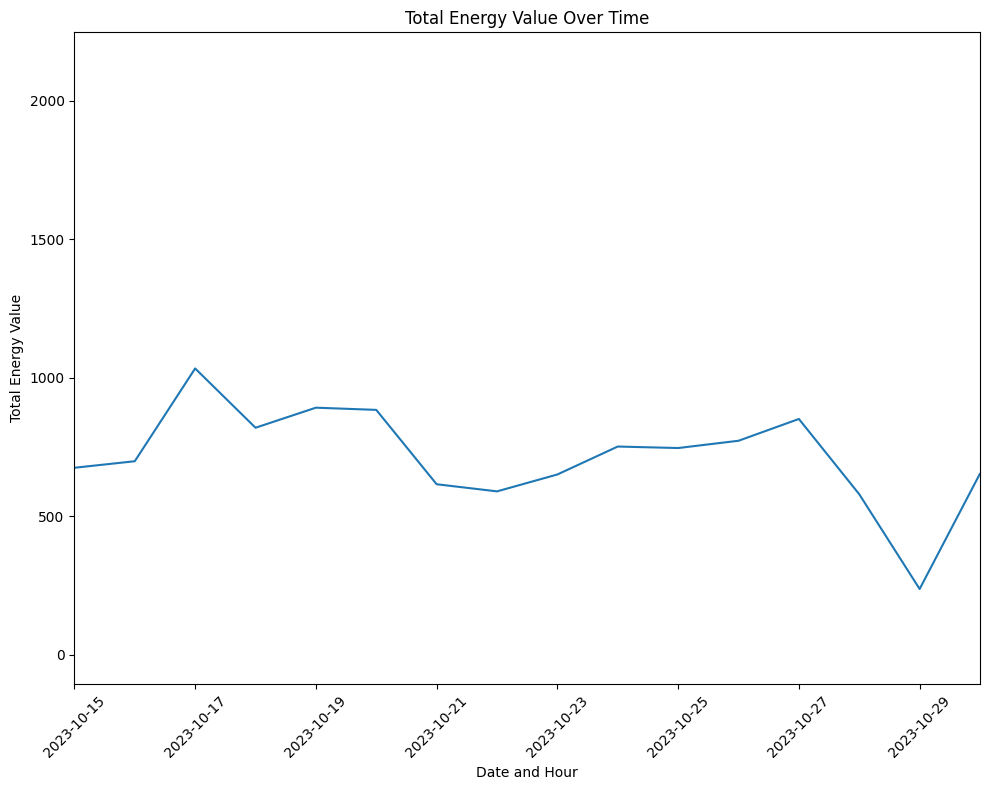

In [46]:
# Observamos un ejemplo mas de cerca del comportamiento del dataset por día
plt.figure(figsize=(10, 8))
plt.plot(Energy_dataset_profile_day)
plt.xlabel('Date and Hour')
plt.ylabel('Total Energy Value')
plt.title('Total Energy Value Over Time')
# Es un filtro en el tiempo
plt.xlim( [pd.to_datetime('2023-10-15 00:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-10-30 00:00:00', format = '%Y-%m-%d %H:%M:%S')])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Modelación**

En este paso se van a crear modelos que puedan predecir el comportamiento del perfil de carga de la energía en el proyecto

In [47]:
# Importamos las librerías necesarias para crear los modelos
from sklearn.metrics import mean_squared_error
import datetime
import statsmodels.api as sm

## 1. Random Walk Y_{t-1} (Also called Naive)

Este modelo copia exactamente el comportamiento de los datos, solo que lo hace con un lag de (en este caso días) valores que empiezan n tiempo antes que los valores originales del dataset, pero son exactamente los mismos

In [48]:
# Definimos la data a predecir
df = Energy_dataset_profile_day['Energy__kWh_']

# Entrenamos el modelo con el 80% de los datos para predecir con el resto
train_size = (int(len(df) * 0.8))
trainData, testData = df[0:train_size], df[(train_size):len(df)]

def naive_random_walk(series, lag):
    predicted_values = []
    for i in range(lag, len(series)):
        predicted_value = series.iloc[i - lag] #+ np.random.normal(0,standard)
        predicted_values.append(predicted_value)
    return pd.Series(predicted_values, index=series.index[lag:])

# El lag es el número de días que va a tomar antes el modelo
# En este caso 7 días, es decir, una semana retrasado
lag = 7
predictions1 = naive_random_walk(testData, lag)

# Para las series de tiempo podemos hallar el score por medio del error cuadrático
# Importamos el error cuadrático de la librería importada
error = mean_squared_error(testData[lag:], predictions1)
# Calculamos el r^2 para sacarle la raíz al resultado y así tener un valor mas pequeño de evaluar
RMSE = error ** 0.5
print('Random Walk MSE: %.3f' % error)
print('Random Walk RMSE: %.3f' % RMSE)

Random Walk MSE: 98031.461
Random Walk RMSE: 313.100


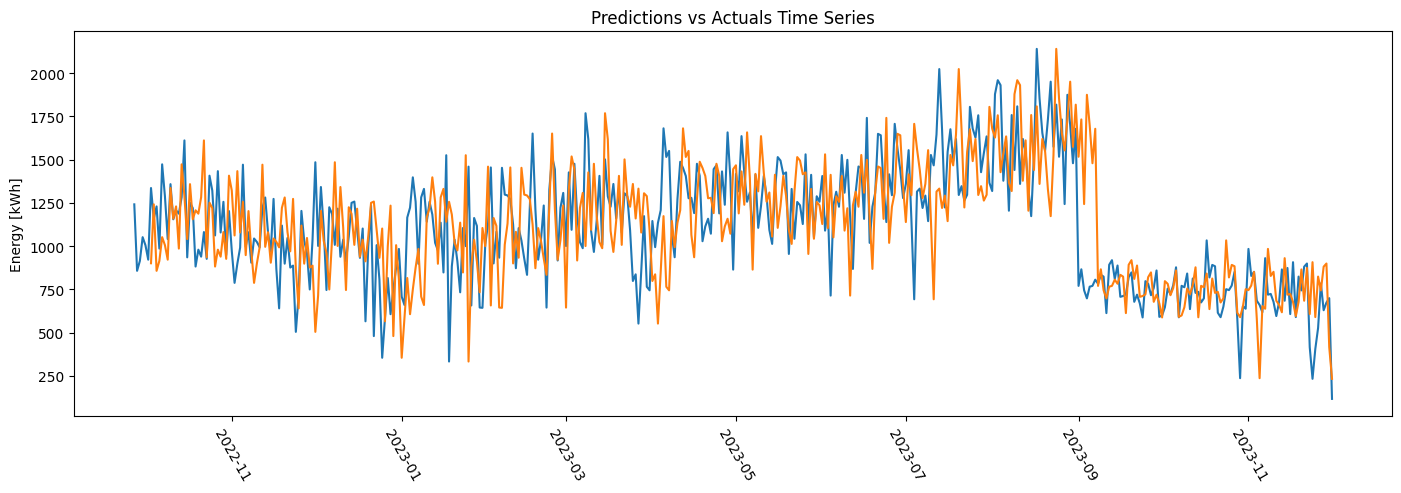

In [49]:
# Grafiamos la serie de riempo original con respecto a la del modelo de predicción para observar como se ajusta
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData[1:])
plt.plot(predictions1)
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

## 2. Naive Model - Mean

Los modelos de pronóstico ingenuos se basan exclusivamente en la observación histórica de las ventas u otras variables, como las ganancias y los flujos de efectivo. No intentan explicar las relaciones causales subyacentes que producen la variable que se pronostica.

In [50]:
# Cargamos el dataset a predecir
df = Energy_dataset_profile_day['Energy__kWh_']

# Entrenamos el modelo con el 80% de los datos para predecir con el resto
train_size = int(len(df) * 0.8)
trainData, testData = df[0:train_size], df[(train_size):len(df)]

def naive_model(series, lag):
    predicted_values = []
    for j in range(lag, len(series)):
        predicted_value = 0
        for i in range(1,8):
            predicted_value = predicted_value + series.iloc[j - (lag*i)]
        predicted_value = (predicted_value/8)
        predicted_values.append(predicted_value)
    return pd.Series(predicted_values, index=series.index[lag:])

# El lag es el número de días que va a tomar antes el modelo
# En este caso 7 días, es decir, una semana retrasado
lag = 7
predictions_naive_model = naive_model(testData, lag)

# Para las series de tiempo podemos hallar el score por medio del error cuadrático
# Importamos el error cuadrático de la librería importada
error = mean_squared_error(testData[lag:], predictions_naive_model)
RMSE = error ** 0.5
print('Persistence MSE: %.3f' % error)
print('Persistence RMSE: %.3f' % RMSE)

Persistence MSE: 113533.854
Persistence RMSE: 336.948


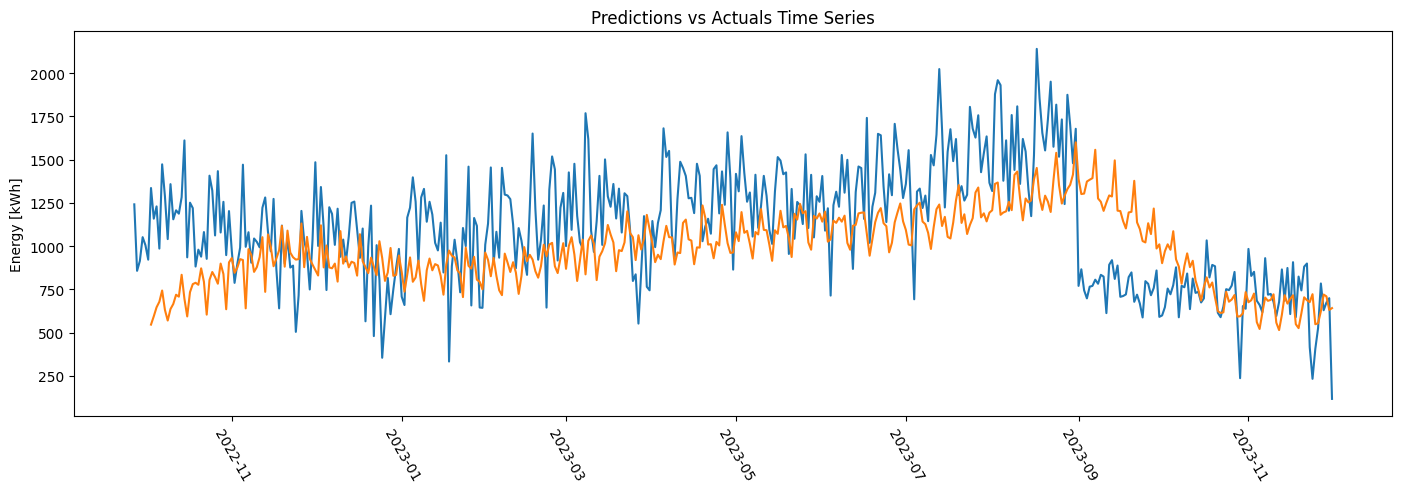

In [51]:
# Grafiamos la serie de riempo original con respecto a la del modelo de predicción para observar como se ajusta
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData[1:])
plt.plot(predictions_naive_model)
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()


## 3. Modelo linearl (AR(p))



In [52]:
# Para obtener la estacionalidad del modelo primero convertimos el dataset en días para que no sea tan grande
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

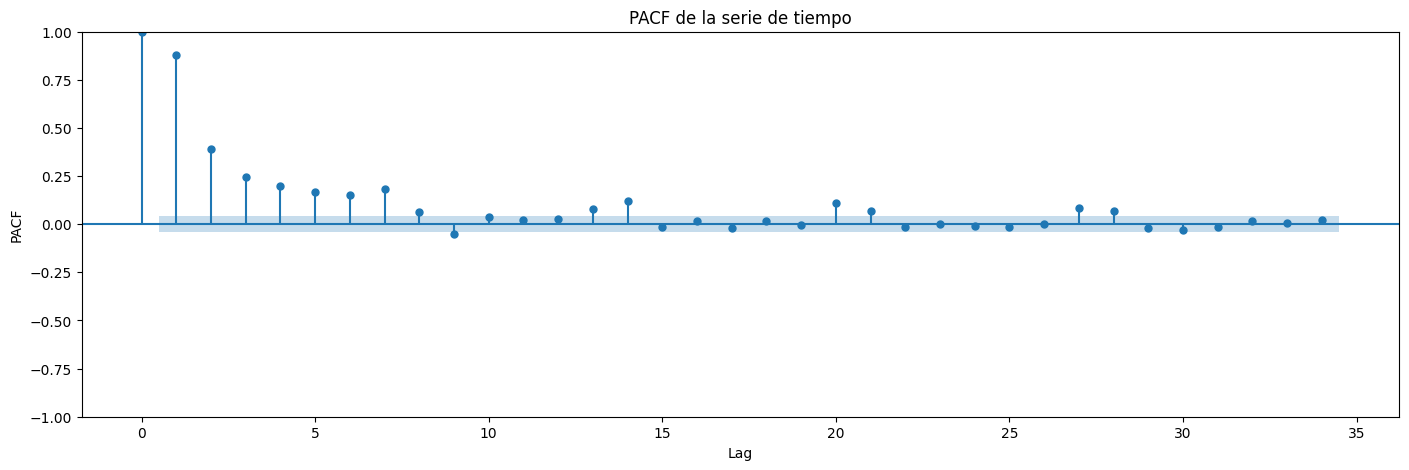

In [53]:
# Importamos de una librería estadística para sacar su PACF
from statsmodels.graphics.tsaplots import plot_pacf

# Gráfico del PACF
plot_pacf(Energy_dataset_profile_day)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('PACF de la serie de tiempo')
plt.show()

Observamos que hay estacionalidad en los datos

In [54]:
# Creamos el modelo lineal
# Cargamos la serie de tiempo
df_linear = Energy_dataset_profile_day.copy()

# Creamos el numero de lags
lags = 28
for i in range(1, lags + 1):
    df_linear[f'lag_{i}'] = df_linear['Energy__kWh_'].shift(i)

# Eliminamos celdas con valores faltantes que no aparezcan en el lag
df_linear = df_linear.dropna()

In [55]:
# Observamos el dataset creado
display(df_linear)

,Energy__kWh_,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,lag_26,lag_27,lag_28
Start_Date___Time_utc,,,,,,,,,,,,,,,,,,,,,
2018-01-30 00:00:00+00:00,62.112,90.370,104.854,84.506,168.140,85.140,337.344,65.216,105.718,40.148,...,120.760,94.076,91.604,48.920,61.224,65.440,46.352,59.056,52.546,17.970
2018-01-31 00:00:00+00:00,61.772,62.112,90.370,104.854,84.506,168.140,85.140,337.344,65.216,105.718,...,110.020,120.760,94.076,91.604,48.920,61.224,65.440,46.352,59.056,52.546
2018-02-01 00:00:00+00:00,153.244,61.772,62.112,90.370,104.854,84.506,168.140,85.140,337.344,65.216,...,57.048,110.020,120.760,94.076,91.604,48.920,61.224,65.440,46.352,59.056
2018-02-02 00:00:00+00:00,262.602,153.244,61.772,62.112,90.370,104.854,84.506,168.140,85.140,337.344,...,27.596,57.048,110.020,120.760,94.076,91.604,48.920,61.224,65.440,46.352
2018-02-03 00:00:00+00:00,157.740,262.602,153.244,61.772,62.112,90.370,104.854,84.506,168.140,85.140,...,8.198,27.596,57.048,110.020,120.760,94.076,91.604,48.920,61.224,65.440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 00:00:00+00:00,784.302,527.095,405.807,233.070,416.242,899.649,881.470,744.277,824.053,590.052,...,719.511,930.632,617.792,660.159,684.603,851.796,827.881,984.115,638.280,653.588
2023-11-28 00:00:00+00:00,629.529,784.302,527.095,405.807,233.070,416.242,899.649,881.470,744.277,824.053,...,723.950,719.511,930.632,617.792,660.159,684.603,851.796,827.881,984.115,638.280
2023-11-29 00:00:00+00:00,674.124,629.529,784.302,527.095,405.807,233.070,416.242,899.649,881.470,744.277,...,678.047,723.950,719.511,930.632,617.792,660.159,684.603,851.796,827.881,984.115


In [56]:
# Separamos los datos de entrenamiento
train_size = int(len(df_linear) * 0.8)
trainData, testData = df_linear[0:train_size], df_linear[(train_size):len(df_linear)]

# Seleccionamos las columnas relevantes del dataset
selected_columns = df_linear.columns.tolist()

# Removemos el target de la lista de columnas
selected_columns.remove('Energy__kWh_')

# Definimos el modelo AR
X = trainData[selected_columns]

# Definimos nuestro target
y = trainData['Energy__kWh_']

# Entrenamos el modelo
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           Energy__kWh_   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              956.4
Date:                Tue, 18 Jun 2024   Prob (F-statistic):                        0.00
Time:                        15:44:57   Log-Likelihood:                         -10727.
No. Observations:                1705   AIC:                                  2.151e+04
Df Residuals:                    1677   BIC:                                  2.166e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
# Eliminamos del dataset nuestro target
testData_x = testData.drop('Energy__kWh_', axis=1)
# Predecimos nuestros valores basados en el entrenamiento
test_predictions = model.predict(testData_x)

In [58]:
# hallamos los scores del modelo
error = mean_squared_error(testData['Energy__kWh_'], test_predictions)
RMSE = error ** 0.5
print('Linear Model MSE: %.3f' % error)
print('Linear Model RMSE: %.3f' % RMSE)

Linear Model MSE: 55242.944
Linear Model RMSE: 235.038


*Hasta el momento el mejor ajuste*

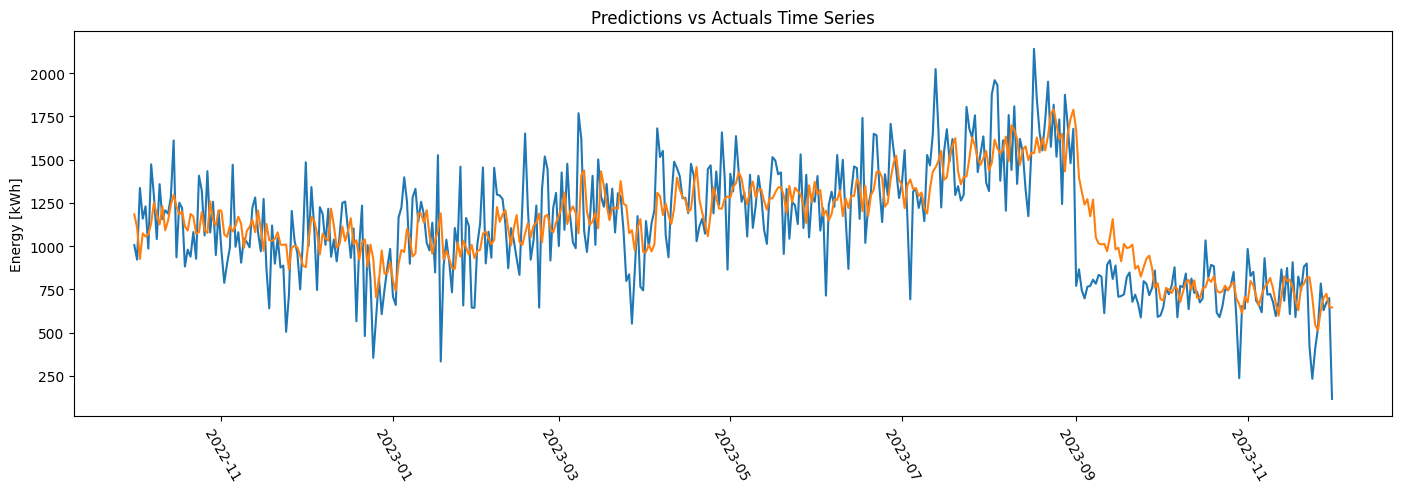

In [59]:
# Grafiamos la serie de riempo original con respecto a la del modelo de predicción para observar como se ajusta
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(test_predictions)
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

## Decision Tree Regressor

In [60]:
# Para obtener la estacionalidad del modelo primero convertimos el dataset en días para que no sea tan grande
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

In [61]:
# Creamos el modelo Decision Tree
# Cargamos la serie de tiempo
df_dtr = Energy_dataset_profile_day.copy()

# Create lag variables
lags = 28  # Number of lags
for i in range(1, lags + 1):
    df_dtr[f'lag_{i}'] = df_dtr['Energy__kWh_'].shift(i)

# Eliminamos celdas con valores faltantes que no aparezcan en el lag
df_dtr = df_dtr.dropna()

In [62]:
# Preparamos los datos
# Separamos los datos de entrenamiento
train_size = int(len(df_dtr) * 0.8)
trainData, testData = df_dtr[0:train_size], df_dtr[(train_size):len(df_dtr)]

# Seleccionamos las columnas relevantes del modelo
selected_columns = df_dtr.columns.tolist()

# Removemos el target de la lista de columnas
selected_columns.remove('Energy__kWh_')

# Dividimas la matriz X y Y
X = trainData[selected_columns]

y = trainData['Energy__kWh_']

In [63]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [64]:
# Inicializamos el Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

#  The max_features parameter controls the maximum number of features to consider when looking for the best split.
#  If max_features is set to less than the total number of features, the algorithm will randomly select a subset of features at each node
#  Random Seed for Tie-Breaking

# Entrenamos el modelo
tree_regressor.fit(X, y)

DecisionTreeRegressor(random_state=42)

In [65]:
# Definimos los datos de test
testData_x = testData.drop('Energy__kWh_', axis=1)

# Hacemos la prediccion en el set de entrenamiento
y_pred_dtr = tree_regressor.predict(testData_x)

In [69]:
# Generamos el datetime index
start_date = pd.Timestamp('2022-10-01')
end_date = pd.Timestamp('2023-12-01')
datetime_index = pd.date_range(start=start_date, end=end_date, freq='D')

# Convert array to DataFrame with datetime index
df_pred_dtr = pd.DataFrame(y_pred_dtr, index=datetime_index, columns=["dtr_pred"])

In [70]:
# Observamos el dataset creado
display(df_pred_dtr)

,dtr_pred
2022-10-01,1115.658
2022-10-02,1462.910
2022-10-03,1112.436
2022-10-04,844.340
2022-10-05,950.172
...,...
2023-11-27,687.798
2023-11-28,999.420
2023-11-29,885.536
2023-11-30,687.034


In [71]:
# hallamos los scores del modelo
error = mean_squared_error(testData['Energy__kWh_'], df_pred_dtr['dtr_pred'])
RMSE = error ** 0.5
print('DTR MSE: %.3f' % error)
print('DTR RMSE: %.3f' % RMSE)

DTR MSE: 114691.233
DTR RMSE: 338.661


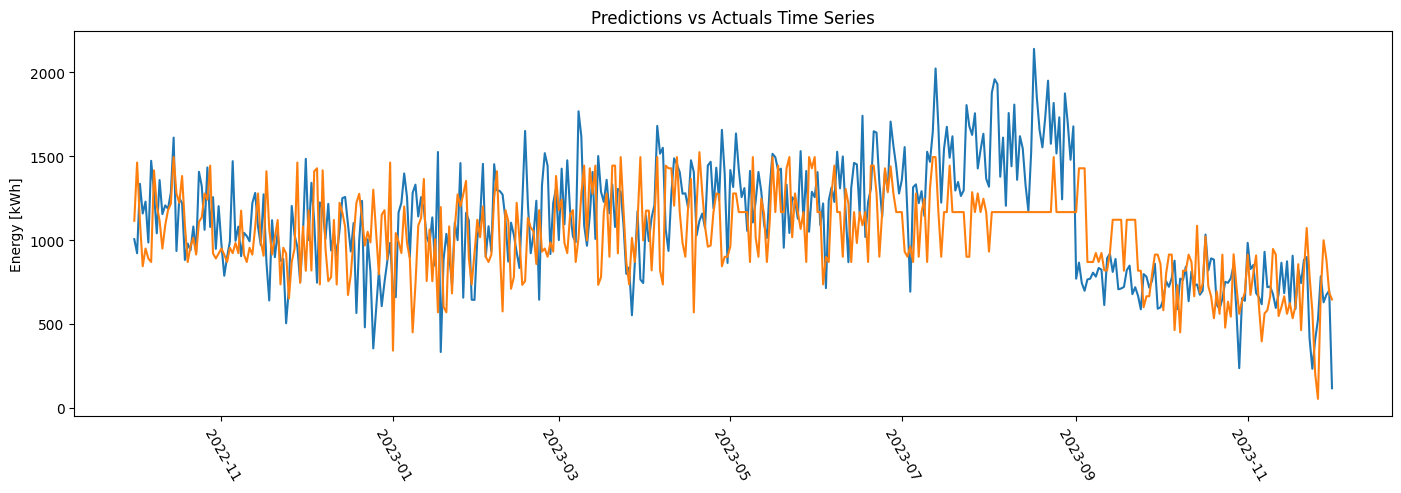

In [72]:
# Graficamos la serie de  tiempo original
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(df_pred_dtr['dtr_pred'])
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

In [73]:
# Para observar el arbol de decisiones que generó la librería con nuestros datos
# importamos la función de la librería
from sklearn.tree import export_text

feature_names = selected_columns
# PImprimimos la estructura del decision tree
tree_rules = export_text(tree_regressor, feature_names = feature_names)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- lag_1 <= 506.08
|   |--- lag_6 <= 368.86
|   |   |--- lag_1 <= 234.57
|   |   |   |--- lag_1 <= 101.43
|   |   |   |   |--- lag_3 <= 105.51
|   |   |   |   |   |--- lag_23 <= 353.63
|   |   |   |   |   |   |--- lag_16 <= 97.80
|   |   |   |   |   |   |   |--- lag_8 <= 61.24
|   |   |   |   |   |   |   |   |--- lag_22 <= 97.23
|   |   |   |   |   |   |   |   |   |--- lag_4 <= 104.55
|   |   |   |   |   |   |   |   |   |   |--- lag_15 <= 57.13
|   |   |   |   |   |   |   |   |   |   |   |--- value: [139.19]
|   |   |   |   |   |   |   |   |   |   |--- lag_15 >  57.13
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- lag_4 >  104.55
|   |   |   |   |   |   |   |   |   |   |--- value: [159.70]
|   |   |   |   |   |   |   |   |--- lag_22 >  97.23
|   |   |   |   |   |   |   |   |   |--- lag_27 <= 422.63
|   |   |   |   |   |   |   |   |   |   |--- lag_17 <= 3.43
|   |   |   |   |   |   |   |   |  

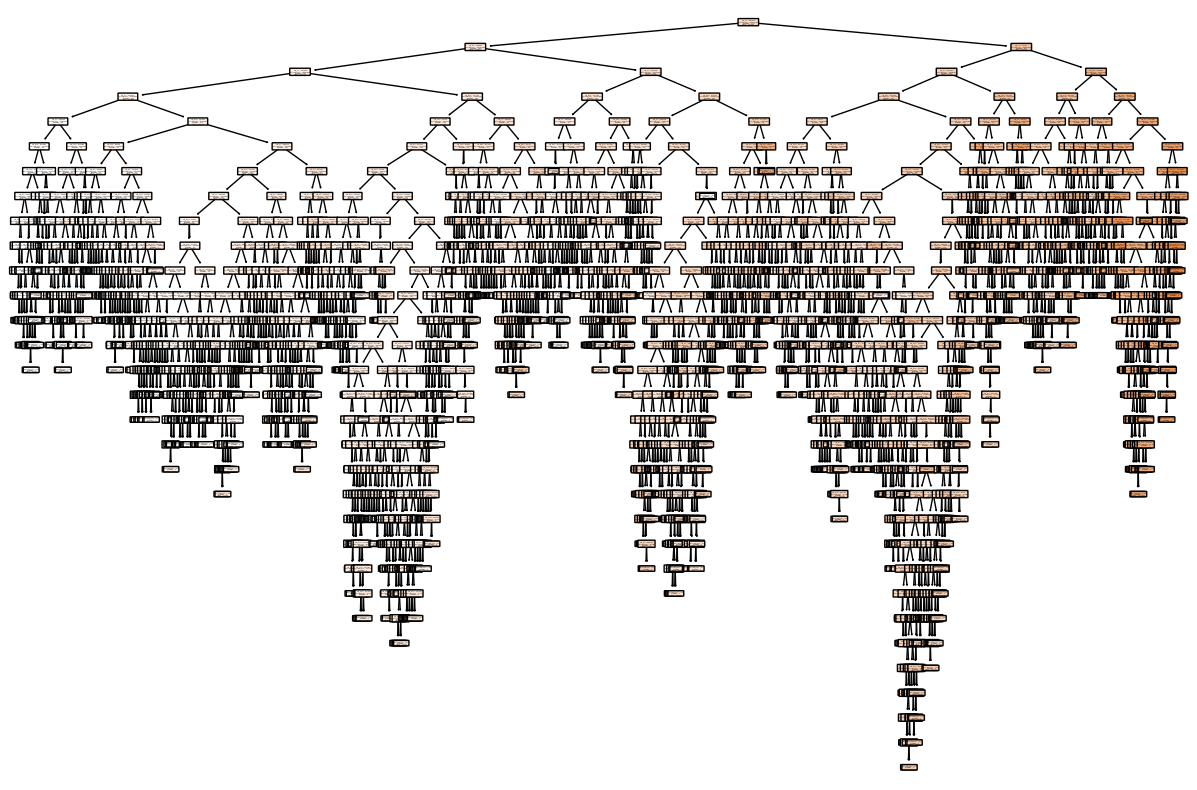

In [74]:
from sklearn.tree import plot_tree

# Para visualizar mejor el arbol de decision
plt.figure(figsize=(15, 10))
plot_tree(tree_regressor,  feature_names = feature_names, filled=True, rounded=True)
plt.show()

### Hyperparámetros de Grid Search en Decision Tree Regressor!

En la estrategia denominada búsqueda en rejilla (o grid search) el proceso anterior se automatiza realizando una búsqueda, no aleatoria en todo el espacio formado por las posibles combinaciones de los parámetros, sino en puntos de dicho espacio repartidos de forma espaciada en una rejilla.

In [75]:
# importamos las librerías necesarias para el grid search
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Dedinimos los parámetros grid para buscar
param_grid = {
    'max_depth': [ 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Inicializamos el Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Inicializamos GridSearchCV
grid_search = GridSearchCV(estimator=tree_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Trabajamos con grid search para encontrarlos mejores parámetros
grid_search.fit(X, y)

# Obtenemos los mejores parámetros
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluamos el modelo con los mejores parámetros
best_tree_regressor = grid_search.best_estimator_
y_pred = best_tree_regressor.predict(testData_x)

# Calculamos sus scores
mse = mean_squared_error(testData['Energy__kWh_'], y_pred)
print("Mean Squared Error with Best Parameters:", mse)
RMSE = mse ** 0.5
print('DTR RMSE: %.3f' % RMSE)

Best Parameters: {'ccp_alpha': 0.2, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean Squared Error with Best Parameters: 93120.343806261
DTR RMSE: 305.156


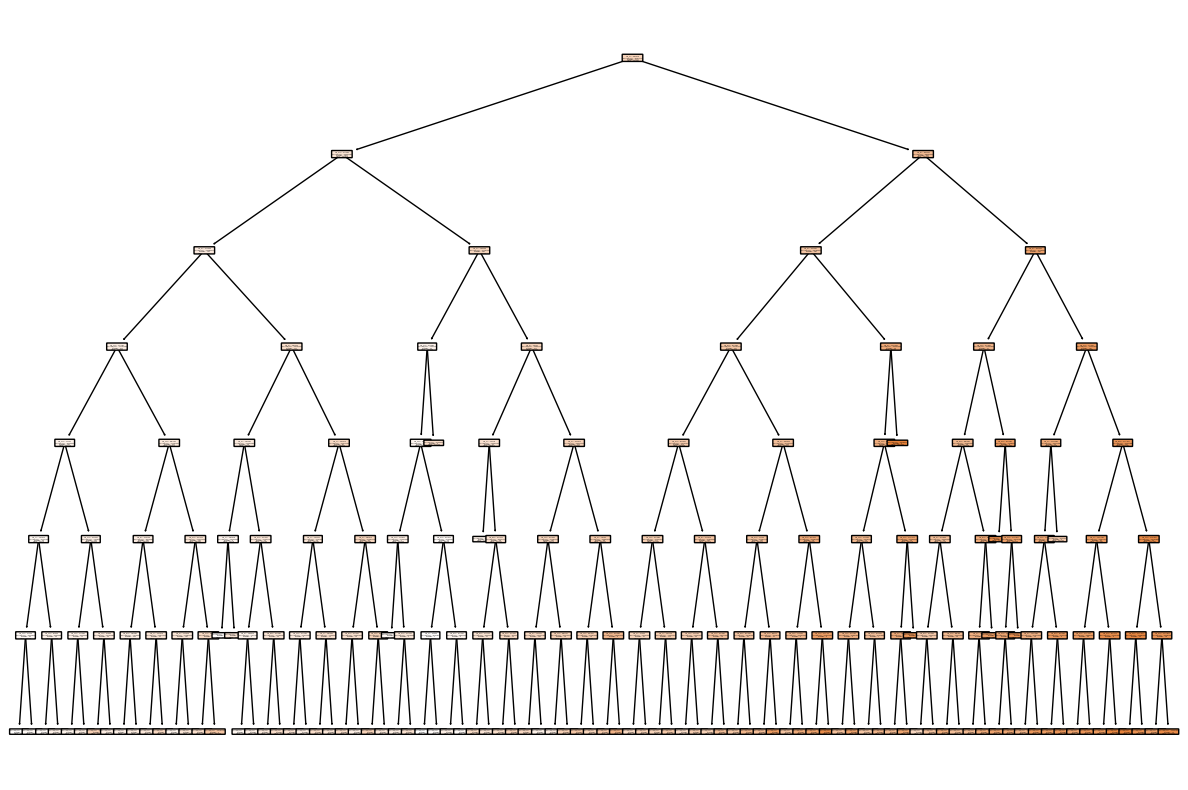

In [76]:
# Visualizamos el mejor arbol de decision creado con los hiperparámetros
plt.figure(figsize=(15, 10))
plot_tree(best_tree_regressor,  feature_names = feature_names, filled=True, rounded=True)
plt.show()

In [77]:
# Generamos una muestra del datatime para graficar los resultados y observar su ajuste
start_date = pd.Timestamp('2022-10-01')
end_date = pd.Timestamp('2023-12-01')
datetime_index = pd.date_range(start=start_date, end=end_date, freq='D')

# Convert array to DataFrame with datetime index
df_pred_dtr = pd.DataFrame(y_pred, index=datetime_index, columns=["dtr_pred"])

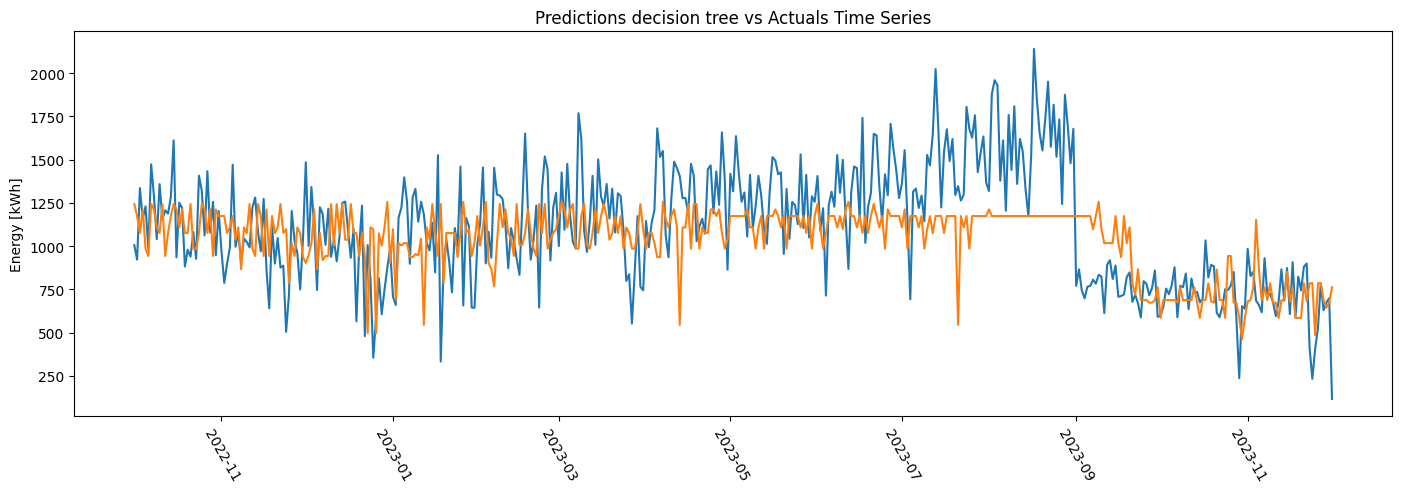

In [78]:
# Graficamos la serie de tiempo original
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(df_pred_dtr["dtr_pred"])
plt.title('Predictions decision tree vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

## Random Forest

Random forest is a commonly-used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems. Decision trees

In [79]:
# Llamamos el dataset en el que vamos a trabajar
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

In [80]:
# cargamos la serie de tiempo
df_dtr = Energy_dataset_profile_day.copy()

# creamos las variables lag
lags = 28  # Number of lags
for i in range(1, lags + 1):
    df_dtr[f'lag_{i}'] = df_dtr['Energy__kWh_'].shift(i)

# Borramos las celdas sin valores
df_dtr = df_dtr.dropna()

In [81]:
# Dividimos los datos en edatos de entrenamiento y de testeo
train_size = int(len(df_dtr) * 0.8)
trainData, testData = df_dtr[0:train_size], df_dtr[(train_size):len(df_dtr)]

# seleccionamos las columnas relevantes para el modelo
selected_columns = df_dtr.columns.tolist()

# Removemos el target (objetivo a predecir) de la lista de columnas
selected_columns.remove('Energy__kWh_')

# Dividimas la matriz X y Y
X = trainData[selected_columns]

y = trainData['Energy__kWh_']

In [82]:
# Luego de la preparación de los datos ahora si importamos el modelo
from sklearn.ensemble import RandomForestRegressor
# Entrenamos el modelo de random forest
# creamos y entrenamos la regresion de random forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [83]:
# definimos los datos a entrenar y testear sin el target
testData_x = testData.drop('Energy__kWh_', axis=1)

# Hcemos la predicción con el modelo
rf_model_pred = rf_model.predict(testData_x)

In [84]:
# generamos un datatime index
start_date = pd.Timestamp('2022-10-01')
end_date = pd.Timestamp('2023-12-01')
datetime_index = pd.date_range(start=start_date, end=end_date, freq='D')

# Convertir el array a DataFrame con el datetime index
df_pred_rf = pd.DataFrame(rf_model_pred, index=datetime_index, columns=["rf_pred"])

In [85]:
# Evaluamos los scores del modelo
error = mean_squared_error(testData['Energy__kWh_'], df_pred_rf['rf_pred'])
RMSE = error ** 0.5
print('Random Forest MSE: %.3f' % error)
print('Random Forest RMSE: %.3f' % RMSE)

Random Forest MSE: 81538.480
Random Forest RMSE: 285.549


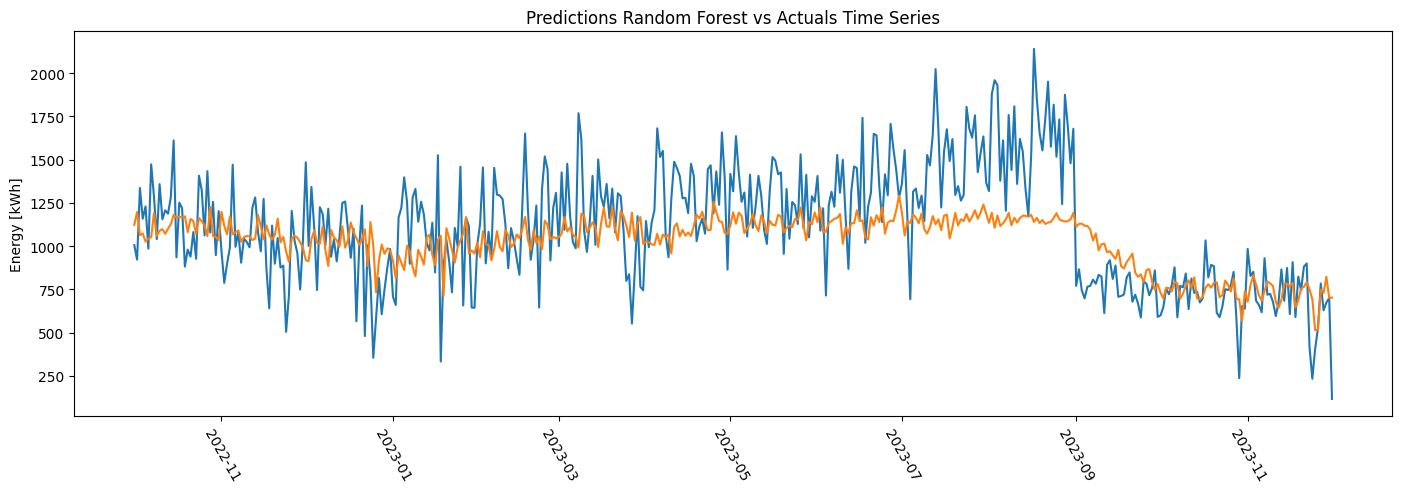

In [86]:
# Graficamos la serie de tiempo original con respecto al modelo
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(df_pred_rf['rf_pred'])
plt.title('Predictions Random Forest vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

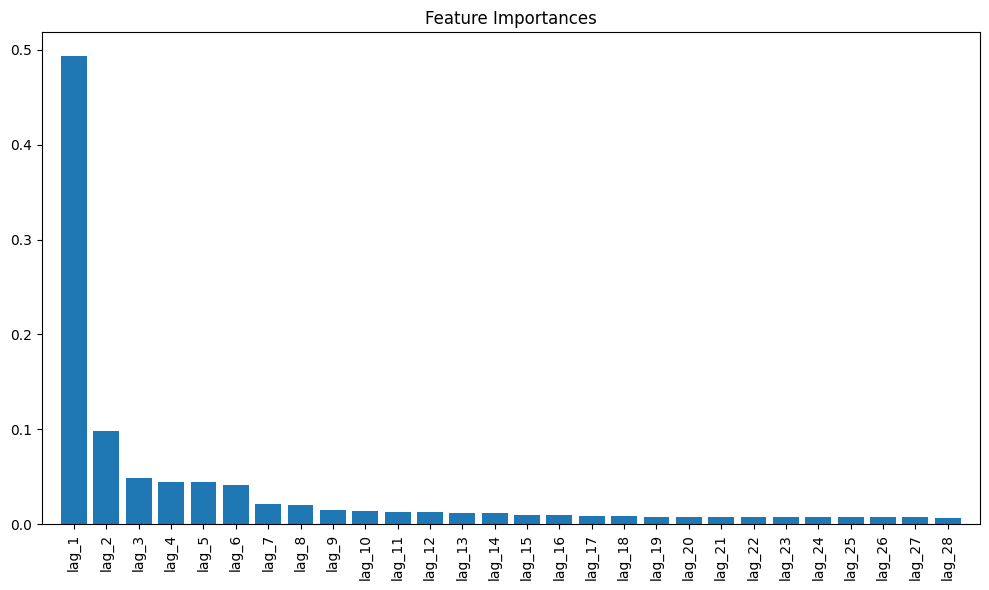

In [87]:
# traemos las features importantes
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Graficamos las feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

el valor máximo de la escala de importancia de características (feature importance) es 1.0. Esto significa que la característica más importante es la que se ubique más cercano a 1.0


Esto muestra que la feature mas importante es el día despues del valor a analizar en el modelo y mientras mas se alejan los días menor importancia tendra a la hora de evaluar la variable

### Hiperparámetros de Grid Search en Random Forest

In [88]:
# Definimos la rejilla de los parametros a bscar
param_grid = {
    'n_estimators': [50, 100, 200],  # Numero de árboles en el bosque
    'max_depth': [None, 5, 10, 20],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Inicializar el RandomForestRegressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Inicializar el GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Trabajamos con grid search para encontrarlos mejores parámetros
grid_search.fit(X, y)

# Obtenemos los mejores parámetros
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluamos el modelo con los mejores parámetros
best_tree_regressor = grid_search.best_estimator_
y_pred = best_tree_regressor.predict(testData_x)

# Sacamos los scores del modelo
mse = mean_squared_error(testData['Energy__kWh_'], y_pred)
print("Mean Squared Error with Best Parameters:", mse)
RMSE = mse ** 0.5

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error with Best Parameters: 82677.72657189275


In [90]:
# Generamos un datatime index
start_date = pd.Timestamp('2022-10-01')
end_date = pd.Timestamp('2023-12-01')
datetime_index = pd.date_range(start=start_date, end=end_date, freq='D')

# Convertir el array a DataFrame con el datetime index
df_pred_dtr = pd.DataFrame(y_pred, index=datetime_index, columns=["dtr_pred"])

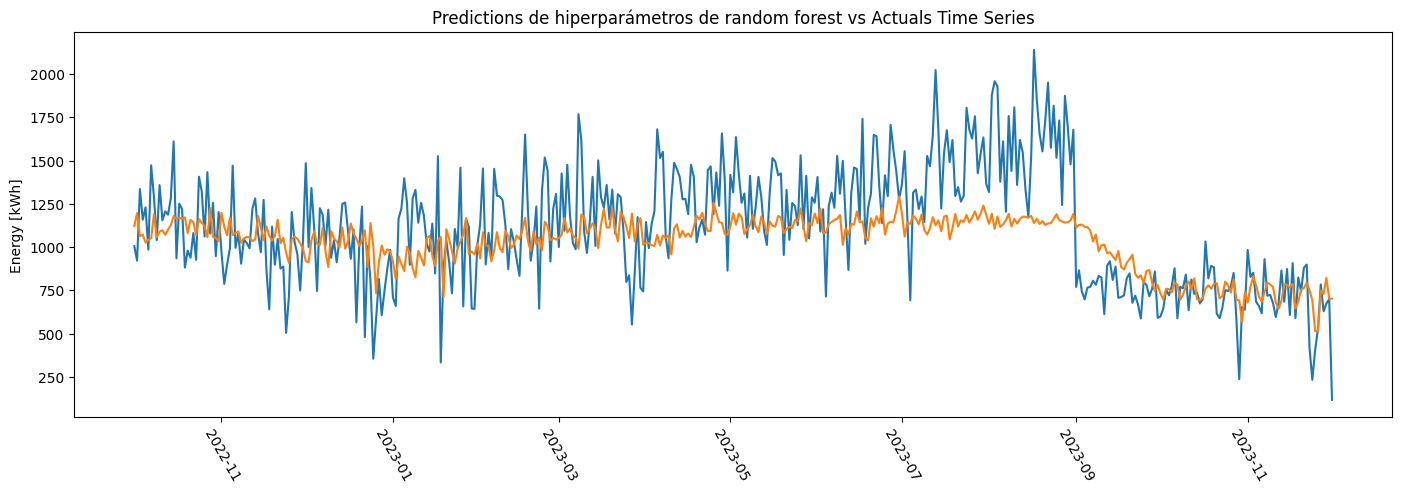

In [91]:
# Graficamos la serie de tiempo original con respecto al modelo creado
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(df_pred_rf['rf_pred'])
plt.title('Predictions de hiperparámetros de random forest vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()

## Neural Networks

In [92]:
# Importamos las librerías de las redes neuronales
from keras.models import Sequential
from keras.layers import Dense, Activation

In [93]:
# Creamos una red neuronal secuencial
model = Sequential([
    Dense(units=5, input_shape=(3,), activation='relu')
])

In [94]:
# Le agregamos densidad a la red neuronal y la activamos
model = Sequential()
model.add(Dense(units=5, input_shape=(3,)))
model.add(Activation('relu'))

In [95]:
# Imprimimos el resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [96]:
# Definir mi modelo secuencial  model1
model1 = Sequential()
model1.add(Dense(64, input_dim=100, activation='relu'))
model1.add(Dense(10, activation='softmax'))

# Imprimir el resumen del model1
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 7114 (27.79 KB)
Trainable params: 7114 (27.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### DNN

In [97]:
# preparar los datos a predecir
Energy_dataset_profile_day = Energy_dataset.resample('D').agg({'Energy__kWh_': 'sum'})

In [98]:
# Load time series data
df_dtr = Energy_dataset_profile_day.copy()

# Create lag variables
lags = 28  # Number of lags
for i in range(1, lags + 1):
    df_dtr[f'lag_{i}'] = df_dtr['Energy__kWh_'].shift(i)

# Drop rows with missing values due to lag
df_dtr = df_dtr.dropna()

In [99]:
# Split data into train and testData sets
train_size = int(len(df_dtr) * 0.8)
trainData, testData = df_dtr[0:train_size], df_dtr[(train_size):len(df_dtr)]

# Select relevant columns for the model
selected_columns = df_dtr.columns.tolist()

# Remove the target variable 'value' from the list of columns
selected_columns.remove('Energy__kWh_')

# Divide the variables matrix X and Y
X = trainData[selected_columns]

y = trainData['Energy__kWh_']

In [100]:
X.shape

(1705, 28)

In [101]:
# Despues de preparar los datos ya podemos entrenarlos
# Importamos las librerías de DNN
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Creamos un modelo secuencial
model = Sequential()

# Añadimos la densidad al modelo de 32 unidades y ReLU activation
model.add(Dense(32, input_shape=(28,), activation='relu'))

# añadir otra densidad layer con 32 units and ReLU activation
model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))
# Añadir una última densidad con una unidad para la regresión (no activation function)
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                928       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 2529 (9.88 KB)
Trainable params: 2529 (9.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
# Entrenamos el modelo
model.fit(X, y, epochs=20, batch_size=36)

Epoch 1/20
48/48 [==============================] - 2s 5ms/step - loss: 57720.6797 - mae: 167.1609
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 20927.4941 - mae: 109.8041
Epoch 3/20
48/48 [==============================] - 0s 3ms/step - loss: 20455.5898 - mae: 108.4029
Epoch 4/20
48/48 [==============================] - 0s 3ms/step - loss: 19233.7266 - mae: 105.2377
Epoch 5/20
48/48 [==============================] - 0s 4ms/step - loss: 18843.8262 - mae: 104.1295
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 18530.1367 - mae: 103.1803
Epoch 7/20
48/48 [==============================] - 0s 4ms/step - loss: 18776.6953 - mae: 103.1595
Epoch 8/20
48/48 [==============================] - 0s 4ms/step - loss: 18144.8887 - mae: 102.1007
Epoch 9/20
48/48 [==============================] - 0s 3ms/step - loss: 17971.0508 - mae: 101.2092
Epoch 10/20
48/48 [==============================] - 0s 4ms/step - loss: 17759.6953 - mae: 101.2307
Epoch 11/

In [104]:
# Predecimos el modelo despues de entrenarlo
#Separamos las feaures del target que vamos a predecir
testData_x = testData.drop('Energy__kWh_', axis=1)
testData_y = testData['Energy__kWh_']


predictions = model.predict(testData_x)

14/14 [==============================] - 0s 1ms/step


In [105]:
# Generate datetime index
start_date = pd.Timestamp('2022-10-01')
end_date = pd.Timestamp('2023-12-01')
datetime_index = pd.date_range(start=start_date, end=end_date, freq='D')

# Convert array to DataFrame with datetime index
df_pred_dnn = pd.DataFrame(predictions, index=datetime_index, columns=["rf_pred"])

In [106]:
# Calcular los scores del modelo
from sklearn.metrics import mean_squared_error
error = mean_squared_error(testData['Energy__kWh_'], df_pred_dnn)
RMSE = error ** 0.5
print('DNN Model MSE: %.3f' % error)
print('DNN Model RMSE: %.3f' % RMSE)

DNN Model MSE: 56511.313
DNN Model RMSE: 237.721


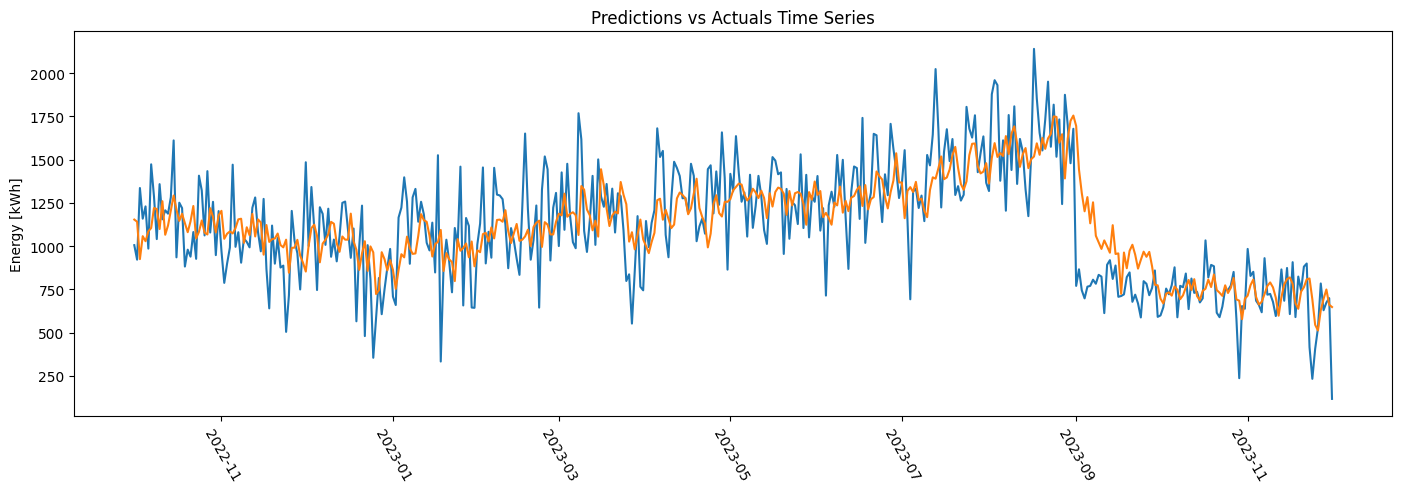

In [107]:
# Graficar las predicciones con respecto a la serie de tiempo original
plt.rcParams['figure.figsize'] = [17, 5]
plt.plot(testData['Energy__kWh_'])
plt.plot(df_pred_dnn['rf_pred'])
plt.title('Predictions vs Actuals Time Series')
plt.ylabel('Energy [kWh]')
plt.xticks(rotation=-60)
#plt.xlim( [pd.to_datetime('2023-05-02 14:00:00', format = '%Y-%m-%d %H:%M:%S'), pd.to_datetime('2023-05-11 06:00:00', format = '%Y-%m-%d %H:%M:%S')])
#plt.figure(figsize=(2, 2))
plt.show()